In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

## Loading Data

In [2]:
cars = pd.read_csv("auto_complectations.csv", delimiter=',')
cars.head()

,brand,model,complect,type_car,seats,doors,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,...,Разгон до сотни,Максимальная скорость,Расход топлива (л/100 км)\nгород / трасса / смешанный,Дорожный просвет,Габариты (длина × ширина × высота),Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,Audi,A3 Sedan,1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
1,Audi,A3 Sedan,sport 1.4 TFSI 7AMT,Седан класса C,5,4,бензиновый (1395 см³),150 л. с.,250 Н·м,роботизированная (7 ступеней),...,8.2 секунды,224 км/ч,5.9 / 4.1 / 4.8,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1320 кг
2,Audi,A3 Sedan,2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,250 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг
3,Audi,A3 Sedan,2.0 TFSI 7AMT quattro,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.2 секунды,242 км/ч,7.2 / 4.8 / 5.7,165 мм,4458 × 1796 × 1416,2637 мм,390 л,845 л,55 л,1465 кг
4,Audi,A3 Sedan,sport 2.0 TFSI 7AMT,Седан класса C,5,4,бензиновый (1984 см³),190 л. с.,320 Н·м,роботизированная (7 ступеней),...,6.8 секунды,242 км/ч,7.2 / 4.7 / 5.6,165 мм,4458 × 1796 × 1416,2637 мм,425 л,880 л,50 л,1395 кг


In [3]:
cars.dtypes

brand                                                    object
model                                                    object
complect                                                 object
type_car                                                 object
seats                                                     int64
doors                                                     int64
Двигатель                                                object
Мощность                                                 object
Крутящий момент двигателя                                object
Коробка передач                                          object
Привод                                                   object
Разгон до сотни                                          object
Максимальная скорость                                    object
Расход топлива (л/100 км)\nгород / трасса / смешанный    object
Дорожный просвет                                         object
Габариты (длина × ширина × высота)      

In [4]:
cars.shape

(1703, 21)

## Cleaning Data

Most of columns are object although they refer to numerical values

In [5]:
def nums_in_column(df, column_name, n=1):
    """
    A function used to seperate numerical values from
    column of string
    
    Attributes:
    - df: pd.DataFrame
    - column_name: str
    - n: int
    
    returns DataFrame
    """
    
    def add_nan(l_of_l):
        """
        A function used to append nans to make square list of list

        Attributes:
        - l_of_l: list of lists

        returns list of list
        """
        for i in range(len(l_of_l)):
            if len(l_of_l[i]) < n:
                l_of_l[i] = [None for _ in range(n)]
        return l_of_l
                
    return pd.DataFrame(
                            np.reshape(
                            add_nan(
                                df[column_name]
                                .str.findall(r"\d*\.\d+|\d+").tolist()
                            )
                            , (df.shape[0], n)).astype(float)
                        )

def emit_diff_unit(df, column, unit):
    """
    if unit is not the same, emit value
    it uses boolean mask
    
    Attributes:
    - df: pd.DataFrame
    - column_name: str
    - unit: str
    
    returns boolean mask
    """
    return (unit in df[column])
    

In [6]:
types = ["седан", "хетчбек", "кроссовер", "внедорожник"]

def type_in_str(s):
    """
    A function used to find substring
    
    Attributes:
    - s: str
    
    returns str
    or None if no substring is found
    """
    for t in types:
        if t in s.lower():
            return t
    return None


def find_types(df, column):
    """
    A function used to seperate numerical values from
    column of string
    
    Attributes:
    - df: pd.DataFrame
    - column: str
    
    returns DataFrame
    """
    return df[column].map(type_in_str)

In [7]:
#r = np.reshape(cars["Габариты (длина × ширина × высота)"].str.extractall("(\d*\.?\d+)")[0].tolist(), (1703, 3)).astype(int)

In [8]:
# seperate numerical values from this column into 3 columns
r = nums_in_column(cars, "Габариты (длина × ширина × высота)", n=3)

In [9]:
# display as a dataframe
df1 = pd.DataFrame(r)
df1.columns = ["длина", "ширина", "высота"]
df1.head()

,длина,ширина,высота
0,4458.0,1796.0,1416.0
1,4458.0,1796.0,1416.0
2,4458.0,1796.0,1416.0
3,4458.0,1796.0,1416.0
4,4458.0,1796.0,1416.0


In [10]:
# repeat for this column
r = nums_in_column(cars, "Расход топлива (л/100 км)\nгород / трасса / смешанный", n=3)
df2 = pd.DataFrame(r)
print(df2)
df2.columns = ["Fuel city", "Fuel highway", "Fuel Mixed"]
df2.head()

        0    1    2
0     5.9  4.1  4.8
1     5.9  4.1  4.8
2     7.2  4.7  5.6
3     7.2  4.8  5.7
4     7.2  4.7  5.6
...   ...  ...  ...
1698  6.4  5.5  5.8
1699  0.0  0.0  8.3
1700  6.4  5.5  5.8
1701  0.0  0.0  2.1
1702  0.0  0.0  2.1

[1703 rows x 3 columns]


,Fuel city,Fuel highway,Fuel Mixed
0,5.9,4.1,4.8
1,5.9,4.1,4.8
2,7.2,4.7,5.6
3,7.2,4.8,5.7
4,7.2,4.7,5.6


In [11]:
frames = [df1, df2]
cleaned_df = pd.concat(frames, axis=1)
cleaned_df.head()

,длина,ширина,высота,Fuel city,Fuel highway,Fuel Mixed
0,4458.0,1796.0,1416.0,5.9,4.1,4.8
1,4458.0,1796.0,1416.0,5.9,4.1,4.8
2,4458.0,1796.0,1416.0,7.2,4.7,5.6
3,4458.0,1796.0,1416.0,7.2,4.8,5.7
4,4458.0,1796.0,1416.0,7.2,4.7,5.6


In [12]:
cleaned_df.shape[0]

1703

In [13]:
cleaned_df["type_car"] = find_types(cars, "type_car")
cleaned_df["type_car"]

0           седан
1           седан
2           седан
3           седан
4           седан
          ...    
1698    кроссовер
1699    кроссовер
1700    кроссовер
1701    кроссовер
1702    кроссовер
Name: type_car, Length: 1703, dtype: object

In [14]:
# Verify 
cars["type_car"].tail()

1698    Большой кроссовер
1699    Большой кроссовер
1700    Большой кроссовер
1701    Большой кроссовер
1702    Большой кроссовер
Name: type_car, dtype: object

### Now apply the conversion functions to all possible columns

In [15]:
columns_to_clean  = cars.columns.tolist()

columns_to_clean.remove("type_car")
columns_to_clean.remove("Габариты (длина × ширина × высота)")
columns_to_clean.remove("seats")
columns_to_clean.remove("doors")
columns_to_clean.remove("Расход топлива (л/100 км)\nгород / трасса / смешанный")
columns_to_clean.remove("model")
columns_to_clean.remove("brand")
columns_to_clean.remove("complect")
columns_to_clean.remove("Привод")
columns_to_clean

['Двигатель',
 'Мощность',
 'Крутящий момент двигателя',
 'Коробка передач',
 'Разгон до сотни',
 'Максимальная скорость',
 'Дорожный просвет',
 'Колёсная база',
 'Объём багажника',
 'Объём багажника максимальный',
 'Объём топливного бака',
 'Масса автомобиля']

In [16]:
for c in columns_to_clean:
    print(c)
    print(nums_in_column(cars, c, n=1))
    cleaned_df[c] = nums_in_column(cars, c, n=1)

Двигатель
           0
0     1395.0
1     1395.0
2     1984.0
3     1984.0
4     1984.0
...      ...
1698  1969.0
1699  1969.0
1700  1969.0
1701  1969.0
1702  1969.0

[1703 rows x 1 columns]
Мощность
          0
0     150.0
1     150.0
2     190.0
3     190.0
4     190.0
...     ...
1698  235.0
1699  320.0
1700  235.0
1701  407.0
1702  407.0

[1703 rows x 1 columns]
Крутящий момент двигателя
          0
0     250.0
1     250.0
2     320.0
3     320.0
4     320.0
...     ...
1698  480.0
1699  400.0
1700  480.0
1701  640.0
1702  640.0

[1703 rows x 1 columns]
Коробка передач
        0
0     7.0
1     7.0
2     7.0
3     7.0
4     7.0
...   ...
1698  8.0
1699  8.0
1700  8.0
1701  8.0
1702  8.0

[1703 rows x 1 columns]
Разгон до сотни
        0
0     8.2
1     8.2
2     6.8
3     6.2
4     6.8
...   ...
1698  7.8
1699  6.5
1700  7.8
1701  5.6
1702  5.6

[1703 rows x 1 columns]
Максимальная скорость
          0
0     224.0
1     224.0
2     250.0
3     242.0
4     242.0
...     ...
1698  22

In [17]:
cars["Разгон до сотни"]

0       8.2 секунды
1       8.2 секунды
2       6.8 секунды
3       6.2 секунды
4       6.8 секунды
           ...     
1698    7.8 секунды
1699    6.5 секунды
1700    7.8 секунды
1701    5.6 секунды
1702    5.6 секунды
Name: Разгон до сотни, Length: 1703, dtype: object

In [18]:
cleaned_df = cleaned_df.dropna()
cleaned_df

,длина,ширина,высота,Fuel city,Fuel highway,Fuel Mixed,type_car,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,4458.0,1796.0,1416.0,5.9,4.1,4.8,седан,1395.0,150.0,250.0,7.0,8.2,224.0,165.0,2637.0,425.0,880.0,50.0,1320.0
1,4458.0,1796.0,1416.0,5.9,4.1,4.8,седан,1395.0,150.0,250.0,7.0,8.2,224.0,165.0,2637.0,425.0,880.0,50.0,1320.0
2,4458.0,1796.0,1416.0,7.2,4.7,5.6,седан,1984.0,190.0,320.0,7.0,6.8,250.0,165.0,2637.0,425.0,880.0,50.0,1395.0
3,4458.0,1796.0,1416.0,7.2,4.8,5.7,седан,1984.0,190.0,320.0,7.0,6.2,242.0,165.0,2637.0,390.0,845.0,55.0,1465.0
4,4458.0,1796.0,1416.0,7.2,4.7,5.6,седан,1984.0,190.0,320.0,7.0,6.8,242.0,165.0,2637.0,425.0,880.0,50.0,1395.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,4950.0,2008.0,1776.0,6.4,5.5,5.8,кроссовер,1969.0,235.0,480.0,8.0,7.8,220.0,237.0,2984.0,721.0,1899.0,71.0,1969.0
1699,4950.0,2008.0,1776.0,0.0,0.0,8.3,кроссовер,1969.0,320.0,400.0,8.0,6.5,230.0,237.0,2984.0,692.0,1899.0,71.0,2004.0
1700,4950.0,2008.0,1776.0,6.4,5.5,5.8,кроссовер,1969.0,235.0,480.0,8.0,7.8,220.0,237.0,2984.0,692.0,1899.0,71.0,2009.0
1701,4950.0,2008.0,1776.0,0.0,0.0,2.1,кроссовер,1969.0,407.0,640.0,8.0,5.6,230.0,237.0,2984.0,640.0,1899.0,70.0,2350.0


In [19]:
cleaned_df.dtypes

длина                           float64
ширина                          float64
высота                          float64
Fuel city                       float64
Fuel highway                    float64
Fuel Mixed                      float64
type_car                         object
Двигатель                       float64
Мощность                        float64
Крутящий момент двигателя       float64
Коробка передач                 float64
Разгон до сотни                 float64
Максимальная скорость           float64
Дорожный просвет                float64
Колёсная база                   float64
Объём багажника                 float64
Объём багажника максимальный    float64
Объём топливного бака           float64
Масса автомобиля                float64
dtype: object

In [20]:
cleaned_df.describe()

,длина,ширина,высота,Fuel city,Fuel highway,Fuel Mixed,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,4691.951257,1887.574257,1624.522468,8.444707,5.384692,7.380427,2305.284844,218.694593,352.356436,6.445545,8.756740,208.642803,181.694593,2795.833968,531.495811,1266.922315,64.946687,1740.397563
std,278.423618,95.795534,144.553754,4.222274,2.494888,2.193485,898.403374,101.736165,166.720591,2.530960,2.267702,24.986848,46.241401,156.223992,148.152094,609.410308,15.256403,369.867674
min,4140.000000,1690.000000,17.000000,0.000000,0.000000,0.000000,0.000000,82.000000,118.000000,0.000000,3.200000,160.000000,0.000000,2480.000000,0.000000,0.000000,0.000000,1075.000000
25%,4458.000000,1820.000000,1484.000000,7.100000,5.000000,6.200000,1598.000000,150.000000,202.000000,6.000000,7.000000,190.000000,160.000000,2670.000000,454.000000,530.000000,55.000000,1454.000000
50%,4690.000000,1863.000000,1649.000000,9.000000,5.800000,7.300000,1998.000000,190.000000,336.000000,7.000000,8.700000,205.000000,190.000000,2790.000000,510.000000,1430.000000,60.000000,1695.000000
75%,4924.000000,1975.000000,1703.000000,10.500000,6.600000,8.300000,2967.000000,249.000000,450.000000,8.000000,10.500000,230.000000,211.000000,2915.000000,580.000000,1725.000000,72.000000,1966.000000
max,5697.000000,2157.000000,1974.000000,20.600000,11.700000,14.500000,6592.000000,625.000000,900.000000,10.000000,15.200000,305.000000,291.000000,3450.000000,1137.000000,3424.000000,138.000000,2817.000000


## Visualizing Data

In [21]:
def plot_hist(data, x_label, y_label="Frequency"):
    plt.hist(data, bins='auto', color='#0504aa', alpha=0.7, rwidth=0.9)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [22]:
def plot_line(data, x_label, y_label):
    plt.plot(data, color='#0504aa', alpha=0.7, rwidth=0.9)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [23]:
def plot_box(data, label):
    plt.boxplot(data)
    plt.title(label)
    plt.grid(axis='y', alpha=0.75)
    plt.show()

### Check for outliers

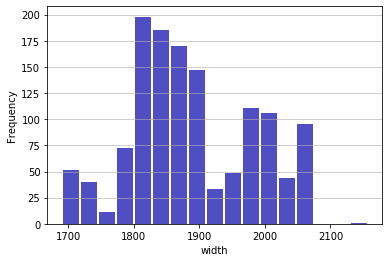

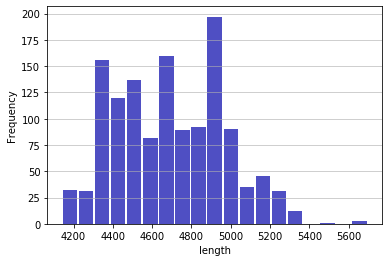

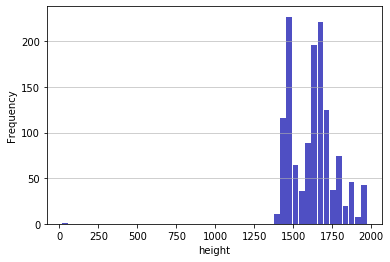

In [24]:
plot_hist(cleaned_df["ширина"], x_label="width")
plot_hist(cleaned_df["длина"], x_label="length")
plot_hist(cleaned_df["высота"], x_label="height")

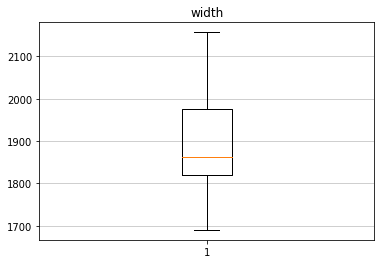

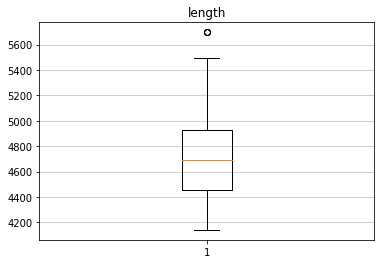

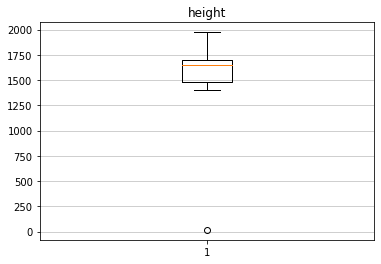

In [25]:
plot_box(cleaned_df["ширина"], label="width")
plot_box(cleaned_df["длина"], label="length")
plot_box(cleaned_df["высота"], label="height")

# 2100 - 1600
# 6000 - 4000
# 2000 - 1400 (filtering needed)

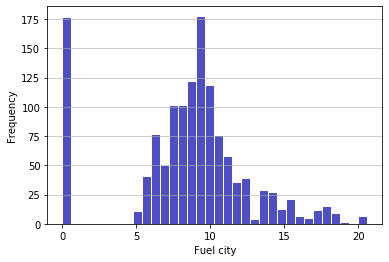

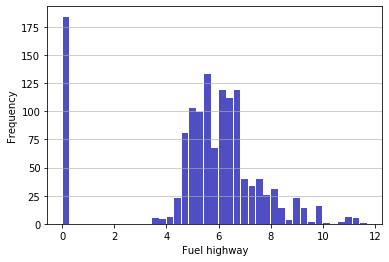

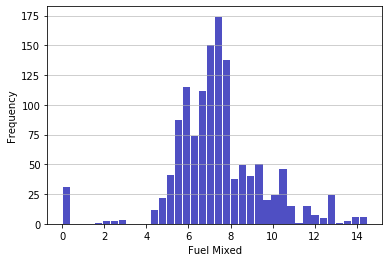

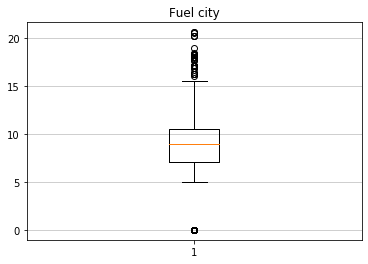

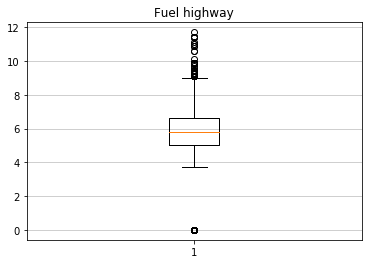

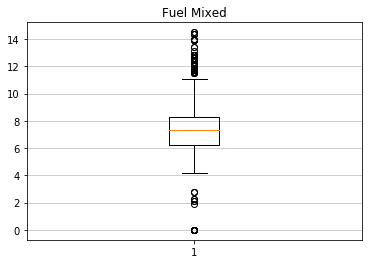

In [26]:
plot_hist(cleaned_df["Fuel city"], x_label="Fuel city")
plot_hist(cleaned_df["Fuel highway"], x_label="Fuel highway")
plot_hist(cleaned_df["Fuel Mixed"], x_label="Fuel Mixed")


plot_box(cleaned_df["Fuel city"], label="Fuel city")
plot_box(cleaned_df["Fuel highway"], label="Fuel highway")
plot_box(cleaned_df["Fuel Mixed"], label="Fuel Mixed")

# 20 - 5
# 12 - 3
# 14 - 2 
# all filtering needed

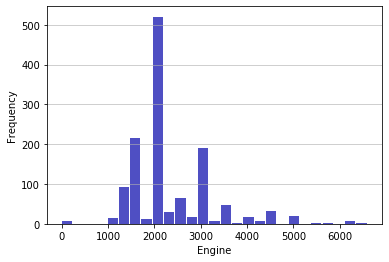

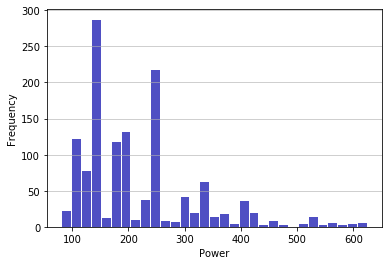

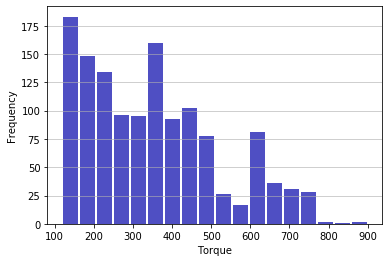

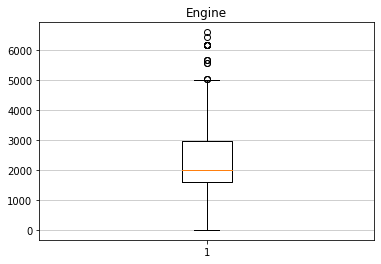

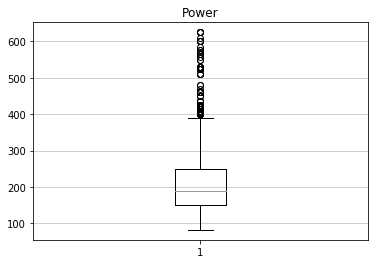

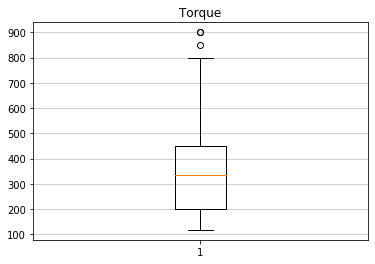

In [27]:
plot_hist(cleaned_df["Двигатель"], x_label="Engine")
plot_hist(cleaned_df["Мощность"], x_label="Power")
plot_hist(cleaned_df["Крутящий момент двигателя"], x_label="Torque")


plot_box(cleaned_df["Двигатель"], label="Engine")
plot_box(cleaned_df["Мощность"], label="Power")
plot_box(cleaned_df["Крутящий момент двигателя"], label="Torque")

# 7000 - 1000 (filter)
# 700 - 100
# 900 - 100 (filter)

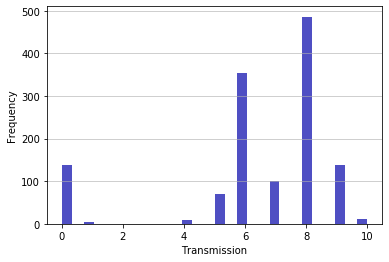

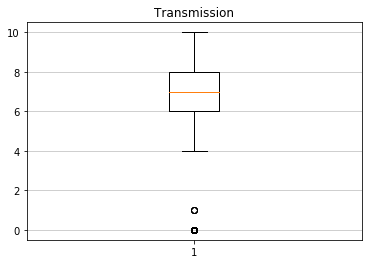

In [28]:
plot_hist(cleaned_df["Коробка передач"], x_label="Transmission")
plot_box(cleaned_df["Коробка передач"], label="Transmission")

# 10 - 4 (filter)

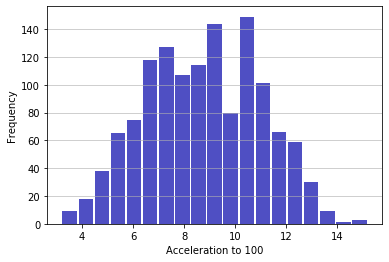

In [29]:
plot_hist(cleaned_df["Разгон до сотни"], x_label="Acceleration to 100")

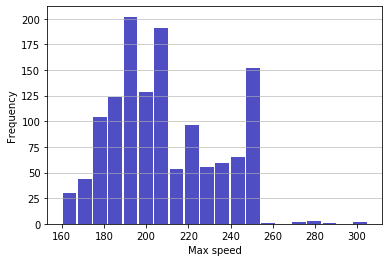

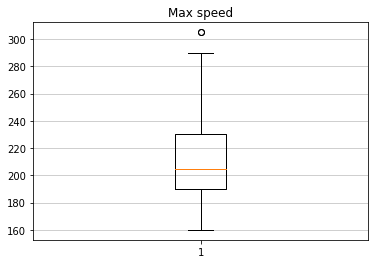

In [30]:
plot_hist(cleaned_df["Максимальная скорость"], x_label="Max speed")
plot_box(cleaned_df["Максимальная скорость"], label="Max speed")

# 350 - 125 (filter)

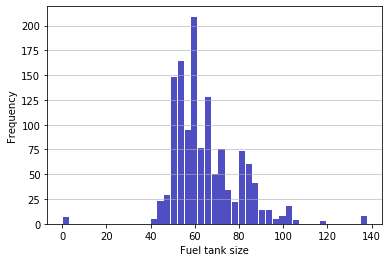

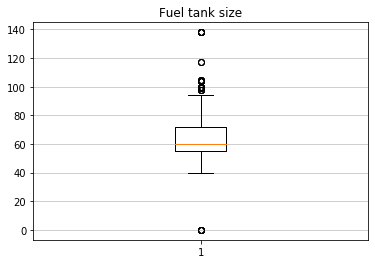

In [31]:
plot_hist(cleaned_df["Объём топливного бака"], x_label="Fuel tank size")
plot_box(cleaned_df["Объём топливного бака"], label="Fuel tank size")

# 140 - 20 (filter)

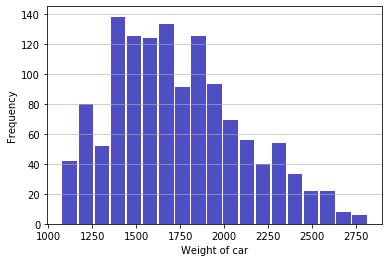

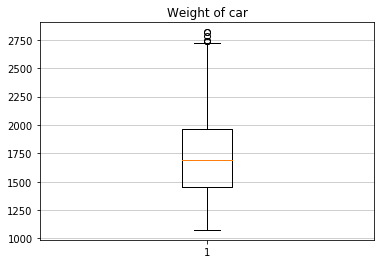

In [32]:
plot_hist(cleaned_df["Масса автомобиля"], x_label="Weight of car")
plot_box(cleaned_df["Масса автомобиля"], label="Weight of car")

# 3000 - 500

## Formulating filtering conditions

    height (высота) : 2000 - 1400
    Fuel:
        city 20 - 5
        highway 12 - 3
        mixed 14 - 2 
        
    Engine (Двигатель) : 7000 - 1000
    Torque (Крутящий момент двигателя) :  900 - 100
    Transmission (Коробка передач) : 10 - 4
    Max speed (Максимальная скорость) : 350 - 125
    Fuel Tank size (Объём топливного бак) : 140 - 20
    

In [33]:
def mask(row):
    """
    A function used to check a row of df
    and return a mask denoting removal if false
    
    Attributes:
    - row: pandas DataFrame
    
    returns boolean
    """
    if row["высота"] < 1400 or row["высота"] > 2000:
        return False
    elif row["Fuel city"] > 20 or row["Fuel city"] < 5:
        return False
    elif row["Fuel highway"] > 12 or row["Fuel highway"] < 3:
        return False
    elif row["Fuel Mixed"] > 14 or row["Fuel Mixed"] < 2:
        return False
    elif row["Двигатель"] > 7000 or row["Двигатель"] < 1000:
        return False
    elif row["Крутящий момент двигателя"] > 900 or row["Крутящий момент двигателя"] < 100:
        return False
    elif row["Коробка передач"] > 10 or row["Коробка передач"] < 4:
        return False
    return True

def filter_df(df):
    """
    A function used to filter a dataframe according to fixed rules
    
    Attributes:
    - df: pandas DataFrame
    
    returns df
    """
    return df[df.apply(mask, axis=1)]
    

In [34]:
filtered_df = filter_df(cleaned_df)
filtered_df.head()

,длина,ширина,высота,Fuel city,Fuel highway,Fuel Mixed,type_car,Двигатель,Мощность,Крутящий момент двигателя,Коробка передач,Разгон до сотни,Максимальная скорость,Дорожный просвет,Колёсная база,Объём багажника,Объём багажника максимальный,Объём топливного бака,Масса автомобиля
0,4458.0,1796.0,1416.0,5.9,4.1,4.8,седан,1395.0,150.0,250.0,7.0,8.2,224.0,165.0,2637.0,425.0,880.0,50.0,1320.0
1,4458.0,1796.0,1416.0,5.9,4.1,4.8,седан,1395.0,150.0,250.0,7.0,8.2,224.0,165.0,2637.0,425.0,880.0,50.0,1320.0
2,4458.0,1796.0,1416.0,7.2,4.7,5.6,седан,1984.0,190.0,320.0,7.0,6.8,250.0,165.0,2637.0,425.0,880.0,50.0,1395.0
3,4458.0,1796.0,1416.0,7.2,4.8,5.7,седан,1984.0,190.0,320.0,7.0,6.2,242.0,165.0,2637.0,390.0,845.0,55.0,1465.0
4,4458.0,1796.0,1416.0,7.2,4.7,5.6,седан,1984.0,190.0,320.0,7.0,6.8,242.0,165.0,2637.0,425.0,880.0,50.0,1395.0


In [35]:
filtered_df.dtypes

длина                           float64
ширина                          float64
высота                          float64
Fuel city                       float64
Fuel highway                    float64
Fuel Mixed                      float64
type_car                         object
Двигатель                       float64
Мощность                        float64
Крутящий момент двигателя       float64
Коробка передач                 float64
Разгон до сотни                 float64
Максимальная скорость           float64
Дорожный просвет                float64
Колёсная база                   float64
Объём багажника                 float64
Объём багажника максимальный    float64
Объём топливного бака           float64
Масса автомобиля                float64
dtype: object

# Predictions

## Type of car

In [36]:
X = filtered_df.drop(['type_car'], axis=1)
y = pd.get_dummies(filtered_df['type_car'])

In [37]:
X.shape

(999, 18)

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=37)

In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [47]:
model = keras.Sequential()

model.add(layers.Dense(18, input_shape=(18,)))
model.add(layers.BatchNormalization())
model.add(layers.Dense(68, activation='tanh'))
model.add(layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 18)                342       
_________________________________________________________________
batch_normalization_1 (Batch (None, 18)                72        
_________________________________________________________________
dense_4 (Dense)              (None, 68)                1292      
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 207       
Total params: 1,913
Trainable params: 1,877
Non-trainable params: 36
_________________________________________________________________


In [48]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

In [49]:
history = model.fit(X_train, y_train, batch_size=64, epochs=100, 
                    validation_data=(X_test, y_test))

Epoch 1/100
13/13 [==============================] - 1s 35ms/step - loss: 0.8633 - accuracy: 0.6721 - val_loss: 1.3198 - val_accuracy: 0.5800
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.5577 - accuracy: 0.8098 - val_loss: 1.2483 - val_accuracy: 0.5700
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.4556 - accuracy: 0.8473 - val_loss: 1.0152 - val_accuracy: 0.5750
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3984 - accuracy: 0.8586 - val_loss: 0.8138 - val_accuracy: 0.6600
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.3416 - accuracy: 0.8648 - val_loss: 0.7199 - val_accuracy: 0.7650
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2970 - accuracy: 0.8723 - val_loss: 0.6017 - val_accuracy: 0.8550
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2683 - accuracy: 0.8924 - val_loss: 0.4628 - val_accuracy: 0.8950
Epoch 8/100


13/13 [==============================] - 0s 8ms/step - loss: 0.0606 - accuracy: 0.9825 - val_loss: 0.0905 - val_accuracy: 0.9450
Epoch 59/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0560 - accuracy: 0.9850 - val_loss: 0.1181 - val_accuracy: 0.9450
Epoch 60/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0636 - accuracy: 0.9800 - val_loss: 0.2434 - val_accuracy: 0.8900
Epoch 61/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0635 - accuracy: 0.9750 - val_loss: 0.0657 - val_accuracy: 0.9850
Epoch 62/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0552 - accuracy: 0.9862 - val_loss: 0.0631 - val_accuracy: 0.9800
Epoch 63/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0554 - accuracy: 0.9837 - val_loss: 0.0899 - val_accuracy: 0.9750
Epoch 64/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0617 - accuracy: 0.9787 - val_loss: 0.0534 - val_accuracy: 0.9850
Epoch 65/100
13/13 

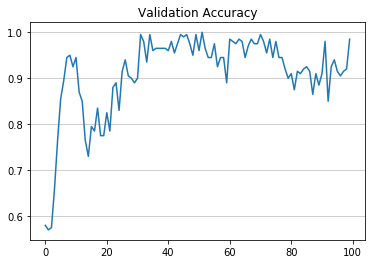

In [52]:
plt.plot(history.history['val_accuracy'])
plt.title('Validation Accuracy')
plt.grid(axis='y', alpha=0.75)
plt.show()

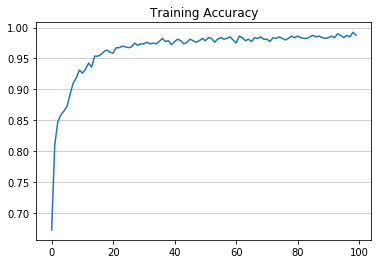

In [53]:
plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [54]:
model_2 = keras.Sequential()

model_2.add(layers.Dense(18, input_shape=(18,)))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Dense(68, activation='tanh'))
model_2.add(layers.BatchNormalization())
model_2.add(layers.Dense(3, activation='softmax'))

print(model_2.summary())

model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, batch_size=64, epochs=100, 
                    validation_data=(X_test, y_test))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 18)                342       
_________________________________________________________________
batch_normalization_2 (Batch (None, 18)                72        
_________________________________________________________________
dense_7 (Dense)              (None, 68)                1292      
_________________________________________________________________
batch_normalization_3 (Batch (None, 68)                272       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 207       
Total params: 2,185
Trainable params: 2,013
Non-trainable params: 172
_________________________________________________________________
None
Epoch 1/100
13/13 [==============================] - 1s 24ms/step - loss: 1.3118 - accuracy: 0.4531 - val_loss:

13/13 [==============================] - 0s 10ms/step - loss: 0.0635 - accuracy: 0.9762 - val_loss: 0.0820 - val_accuracy: 0.9850
Epoch 52/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0626 - accuracy: 0.9837 - val_loss: 0.0906 - val_accuracy: 0.9650
Epoch 53/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0581 - accuracy: 0.9850 - val_loss: 0.0533 - val_accuracy: 0.9950
Epoch 54/100
13/13 [==============================] - 0s 10ms/step - loss: 0.0632 - accuracy: 0.9737 - val_loss: 0.0531 - val_accuracy: 1.0000
Epoch 55/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0520 - accuracy: 0.9825 - val_loss: 0.0810 - val_accuracy: 0.9850
Epoch 56/100
13/13 [==============================] - 0s 9ms/step - loss: 0.0571 - accuracy: 0.9800 - val_loss: 0.0924 - val_accuracy: 0.9750
Epoch 57/100
13/13 [==============================] - 0s 8ms/step - loss: 0.0636 - accuracy: 0.9837 - val_loss: 0.0864 - val_accuracy: 0.9800
Epoch 58/100
13/

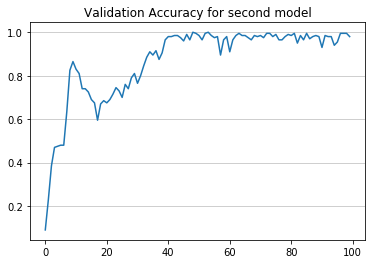

In [55]:
plt.plot(history_2.history['val_accuracy'])
plt.title('Validation Accuracy for second model')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [ ]:
cars[np.isnan(cars)]